In [4]:
import pandas as pd
import datetime
from datetime import datetime
import sqlalchemy
import mysql.connector
import sqlite3
import pandas as pd
import getDays
import pymysql as dbapi
import daysAndDates
import os

#
# Get some time/date info
#

dayInfo = daysAndDates.daysAndDates()
month, month_num, date, year = dayInfo[0], dayInfo[1], dayInfo[2], dayInfo[3]
print(month, month_num, date, year)
yesterday = int(dayInfo[4])
nextDay = int(dayInfo[5])
month_num = int(month_num)
date = int(date)

#
# Get data from the table
#

QUERY = """SELECT * FROM davisUpdate 
           WHERE month = %s""" % (month_num)

#
# use environmental variables for the SQL query
#

db_user = os.environ.get('dbUser')
db_password = os.environ.get('dbPass')

db = dbapi.connect(host='3.135.162.69',user=db_user,passwd=db_password, database = 'davisf6')

cur = db.cursor()
cur.execute(QUERY)
records = cur.fetchall()

#
# Dump the data into a pandas DataFrame
#

df = pd.DataFrame(records, columns = ['index', 'Year', 'Month', 'Date', 'High', 'Low', 'avgTemp', 'HDD', 'CDD', 'Rainfall', 'Max_Dew_Point'])

October 10 31 2023


[63 55 61 62 60 64 65 64 65 60 62 66 74 77 74 82 66 78 54] [49 44 48 44 48 46 44 56 55 47 45 41 48 54 58 62 60 50 48] [13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]


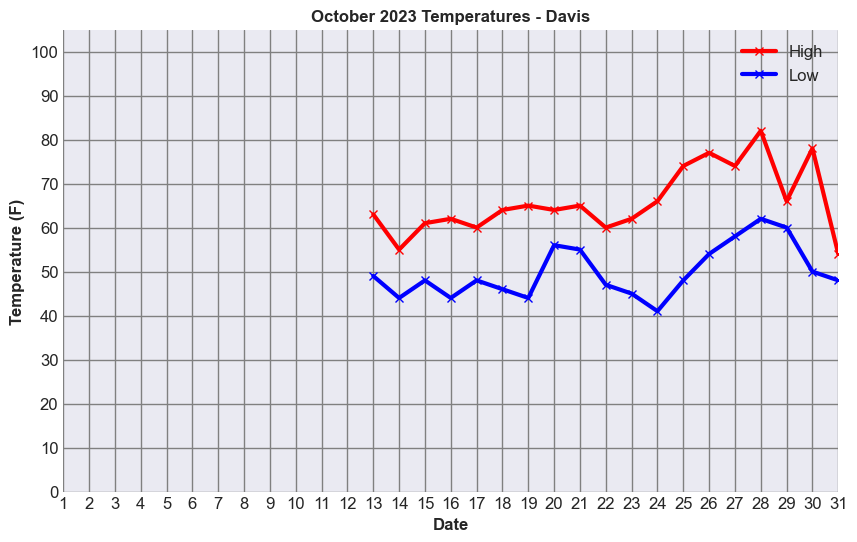

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
import getDays
import numpy as np

sta = ['Davis']

for qwe in sta:        
       
    df['Date'] = df['Date'].astype(int)    
    df['High'] = df['High'].astype(int) 
    df['Low'] = df['Low'].astype(int) 
        
    HI = df['High']
    LO = df["Low"]
    DATE = df["Date"]

    y = HI.to_numpy()
    y1 = LO.to_numpy()
    x = DATE.to_numpy()   
    print(y,y1,x)
            
    path1 = '/var/www/html/trclimate/'
    #path1 = '/Users/jameshayes/Sites/'
        
    plt.style.use('seaborn-v0_8-dark')                       
    plt.figure(figsize = (10,6))
            
    plt.xticks(fontsize = 12)
    plt.xlabel('Date', fontsize=12, fontweight = 'bold')
    plt.locator_params(axis = 'x', nbins = date)
    plt.xlim(1, date)
        
    plt.ylim(0, 105)
    plt.yticks(fontsize = 12)
    plt.ylabel('Temperature (F)', fontsize = 12, fontweight ='bold')
    plt.locator_params(axis = 'y', nbins = 20)
    plt.grid(axis = "x", linewidth = 1.0, color = 'gray')
    
    plt.title(f'{month} {year} Temperatures - {qwe}', fontsize=12, fontweight ='bold')
    plt.grid(True)
    plt.grid(axis = "y", linewidth = 1.0, color = 'gray')
    
    plt.plot(x, y, marker = "x", color = "red", linewidth =3, label ="High")
    plt.plot(x, y1, marker = "x", color = "blue", linewidth =3, label ="Low")      
    plt.legend(fontsize = 12)
    plt.savefig(f'{path1}Temps_test_{qwe}')         
    #plt.show()